<a href="https://colab.research.google.com/github/Akashkunwar/Dscourses/blob/main/Guvi/Project/Chennai_house_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chennai House Price Prediction

##Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

##Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.







Till 18th June:

###For every feature:
1. missing values
2.  outliers
3.  spelling mistakes
4.  data in the right format

###EDA:
####for every feature : plot:
1. distribution of the
feature
2. IMPORTANT : ft vs target




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Project/train-chennai-sale.csv")
pd.set_option('display.max_columns', None)
data.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [ ]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7056 non-null   object        
 1   area           7056 non-null   object        
 2   sale_cond      7056 non-null   object        
 3   park_facil     7056 non-null   object        
 4   buildtype      7056 non-null   object        
 5   utility_avail  7056 non-null   object        
 6   street         7056 non-null   object        
 7   mzzone         7056 non-null   object        
 8   date_build     7056 non-null   datetime64[ns]
 9   date_sale      7056 non-null   datetime64[ns]
 10  property_age   7056 non-null   int64         
 11  int_sqft       7056 non-null   int64         
 12  dist_mainroad  7056 non-null   int64         
 13  n_bedroom      7056 non-null   int64         
 14  n_bathroom     7056 non-null   int64         
 15  n_room         7056 n

In [ ]:
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.map({'velachery':'velachery',
                       'velchery':'velachery', 
                       'kknagar':'kk nagar',
                       'kk nagar':'kk nagar', 
                       'tnagar':'t nagar',
                       't nagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'chrompet':'chrompet',
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'anna nagar':'anna nagar',
                       'karapakam':'karapakkam',
                       'karapakkam':'karapakkam', 
                       'adyr':'adyar',
                       'adyar':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.map({'adjland':'adjland',
                       'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partial':'partial', 
                       'partiall':'partial',
                       'abnormal':'abnormal', 
                       'ab normal':'abnormal', 
                       'family':'family'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.map({'yes':'yes',
                       'no':'no', 
                       'noo':'noo'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.map({'house':'house',
                       'commercial':'commercial', 
                       'comercial':'commercial', 
                       'others':'other', 
                       'other':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.map({'allpub':'allpub',
                                             'all pub':'allpub',
                                             'nosewr':'nosewa',
                                             'nosewa':'nosewa',
                                             'elo':'elo'})
                                            
# Filling null value with 'nosewa' because unable to map by unknown reasion                                           
data.utility_avail = data.utility_avail.fillna('nosewa')


# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.map({'paved':'paved',
                       'pavd':'paved', 
                       'no access':'no access', 
                       'noaccess':'no access', 
                       'gravel':'gravel'})


# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.map({'paved':'paved',
                       'pavd':'paved', 
                       'no access':'no access', 
                       'noaccess':'no access', 
                       'gravel':'gravel'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price'])

In [ ]:
data.head(3)

,prt_id,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,date_build,date_sale,property_age,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,karapakkam,abnormal,yes,commercial,allpub,paved,a,1967-05-15,2011-05-04,44,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,anna nagar,abnormal,no,commercial,allpub,gravel,rh,1995-12-22,2006-12-19,11,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,adyar,abnormal,yes,commercial,elo,gravel,rl,1992-02-09,2012-02-04,20,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200


In [ ]:
data.corr().style.background_gradient(cmap='coolwarm')

,property_age,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
property_age,1.000000,-0.013608,-0.003065,-0.045636,-0.019123,-0.034339,0.019385,0.023868,-0.016667,0.012990,-0.117819,-0.089356,-0.120418
int_sqft,-0.013608,1.000000,0.002267,0.786721,0.517103,0.951305,0.020495,-0.007249,0.009643,0.013830,0.658005,0.571667,0.612668
dist_mainroad,-0.003065,0.002267,1.000000,-0.001938,0.002496,0.002313,0.002739,-0.030999,0.001141,-0.017482,0.011144,0.010203,0.018062
n_bedroom,-0.045636,0.786721,-0.001938,1.000000,0.756016,0.840654,0.015508,-0.006461,0.015810,0.013932,0.456759,0.431035,0.332595
n_bathroom,-0.019123,0.517103,0.002496,0.756016,1.000000,0.570110,0.013487,-0.011091,0.012278,0.007858,0.262570,0.258199,0.110984
n_room,-0.034339,0.951305,0.002313,0.840654,0.570110,1.000000,0.016710,-0.006636,0.015618,0.015234,0.631578,0.534058,0.603417
qs_rooms,0.019385,0.020495,0.002739,0.015508,0.013487,0.016710,1.000000,0.009111,0.009570,0.517906,0.020699,0.009068,0.022278
qs_bathroom,0.023868,-0.007249,-0.030999,-0.006461,-0.011091,-0.006636,0.009111,1.000000,-0.012320,0.551172,-0.007145,-0.001381,-0.012346
qs_bedroom,-0.016667,0.009643,0.001141,0.015810,0.012278,0.015618,0.009570,-0.012320,1.000000,0.630583,0.022313,0.020660,0.020079
qs_overall,0.012990,0.013830,-0.017482,0.013932,0.007858,0.015234,0.517906,0.551172,0.630583,1.000000,0.022175,0.016722,0.020352


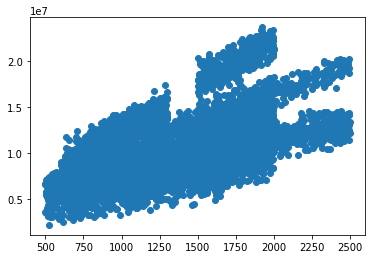

In [ ]:
plt.scatter(data.int_sqft,data.sales_price)
plt.show()

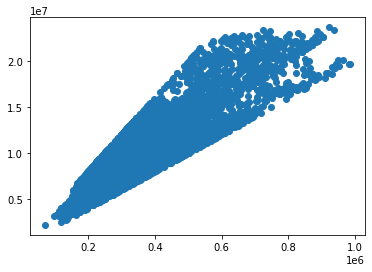

In [ ]:
plt.scatter(data.reg_fee,data.sales_price)
plt.show()